# Bibliotecas Necessárias Para Aplicação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Carregamento da Base de Dados
- Origem: https://archive.ics.uci.edu/dataset/10/automobile

In [2]:
dataset_carros = pd.read_csv('/home/yurilima/Downloads/automobile/imports-85.data', sep=',')

# Tratando os Dados Para a Análise

- Editando a lista de colunas para melhor entendimento dos dados

In [3]:
lista = [
    "symboling",
    "normalized-losses",
    "make",
    "fuel-type",
    "aspiration",
    "num-of-doors",
    "body-style",
    "drive-wheels",
    "engine-location",
    "wheel-base",
    "length",
    "width",
    "height",
    "curb-weight",
    "engine-type",
    "num-of-cylinders",
    "engine-size",
    "fuel-system",
    "bore",
    "stroke",
    "compression-ratio",
    "horsepower",
    "peak-rpm",
    "city-mpg",
    "highway-mpg",
    "price"
]

In [4]:
dataset_carros.columns = lista
dataset_carros.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


- Foi notado que na base de dados existem alguns valores representados pelo caracter <strong>'?'</strong>, então que seja possível executar interpolação para os dados numéricos todos os <strong>'?'</strong> foram substituídos por valores nulos nativos da biblioteca Numpy. 
As colunas afetadas pelo código foram:<br>
<table>
  <tr>
    <th>normalized-losses</th>
    <th>num-of-doors</th>
    <th>bore</th>
    <th>stroke</th>
    <th>horse-power</th>
    <th>peak-rpm</th>
    <th>price</th>
  </tr>
</table>

- Já os dados categoricos passaram pelo mesmo tratamento, contudo, não será um impencilho para futuros tratamentos de dados.

In [5]:
def to_nan(x):
    if x == '?':
        return np.nan
    else:
        return x

for coluna in dataset_carros:
    dataset_carros[coluna] = dataset_carros[coluna].apply(to_nan)

dataset_carros.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


# Analisando e Escolhendo Colunas Para Melhor Perfomance do Algoritmo

### Para ter um visão geral dos dados

In [6]:
for coluna in dataset_carros:
    print('__________' + coluna.upper() + '__________')
    print(dataset_carros[coluna].unique())

__________SYMBOLING__________
[ 3  1  2  0 -1 -2]
__________NORMALIZED-LOSSES__________
[nan '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
__________MAKE__________
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
__________FUEL-TYPE__________
['gas' 'diesel']
__________ASPIRATION__________
['std' 'turbo']
__________NUM-OF-DOORS__________
['two' 'four' nan]
__________BODY-STYLE__________
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
__________DRIVE-WHEELS__________
['rwd' 'fwd' '4wd']
__________ENGINE-LOCATION__________
['front' 'rear']
__________WHEEL-BASE__________

Pelo panomara geral do dados, os dados categóricos necessitam de mais atenção para escolha da participação no algoritmo, pois quando se trata da escolha de preços de carros, é provável que possa confundir o algoritmo, pois não seriam necessariamente relevantes. 

- Escolhendo Dados Categóricos

In [7]:
dataset_carros_dados_categoricos = dataset_carros[["symboling",  
    "make",
    "fuel-type",
    "aspiration",
    "num-of-doors",
    "body-style",
    "drive-wheels",
    "engine-location",
    "engine-type",
    "num-of-cylinders",
    "fuel-system"]]
dataset_carros_dados_categoricos

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
2,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
4,2,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...,...
199,-1,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
200,-1,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
201,-1,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
202,-1,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


A partir da análise das colunas apresentadas com os dados categóricos e seus respectivos significados, é possível retirar o campo de 'symboling'. O motivo é que o campo 'make' possui o mesmo valor porém de forma mais clara as marcas dos carros em questão. Além disso, a coluna 'symboling' está representada de forma de intervalo de 3 a -2, sendo que números diferentes acabam representando a mesma marca de veículo. Os outros campos permanecerão disponíveis para essa análise, pois está sendo considerado nesse estudo que os fatores restantes são importantes para impactar no valor de venda do veículo.

In [8]:
dataset_carros = dataset_carros.drop('symboling', axis=1)
dataset_carros

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## Tratando Dados Nulos

In [9]:
dataset_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    object 
 1   make               204 non-null    object 
 2   fuel-type          204 non-null    object 
 3   aspiration         204 non-null    object 
 4   num-of-doors       202 non-null    object 
 5   body-style         204 non-null    object 
 6   drive-wheels       204 non-null    object 
 7   engine-location    204 non-null    object 
 8   wheel-base         204 non-null    float64
 9   length             204 non-null    float64
 10  width              204 non-null    float64
 11  height             204 non-null    float64
 12  curb-weight        204 non-null    int64  
 13  engine-type        204 non-null    object 
 14  num-of-cylinders   204 non-null    object 
 15  engine-size        204 non-null    int64  
 16  fuel-system        204 non

- Analisando os dados nulos acima, é perceptível que o número de dados que mais está desfalcado é o campo de 'normalized-losses'. Contudo, por representar valores de seguros referentes ao veículo, se faz importante manter na analise e preencher os campos nulos através da interpolação. Os outros campos não possuem muito desfalque de informação, representando em média dois dados faltantes por campo, por isso serão removidos da análise.

<AxesSubplot:title={'center':'Antes da Intepolação'}>

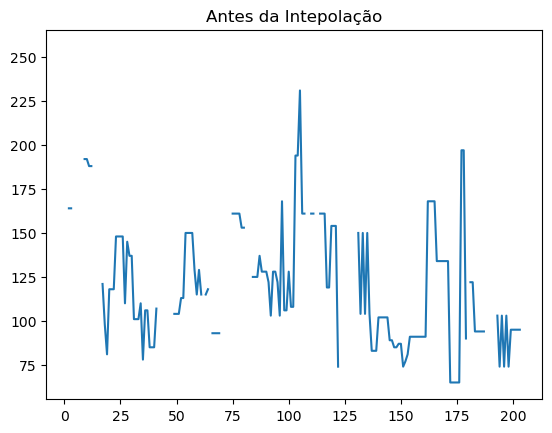

In [10]:
dataset_carros['normalized-losses'] = dataset_carros['normalized-losses'].astype('float')
dataset_carros['normalized-losses'].plot(title='Antes da Intepolação')

<AxesSubplot:title={'center':'Depois da Interpolação'}>

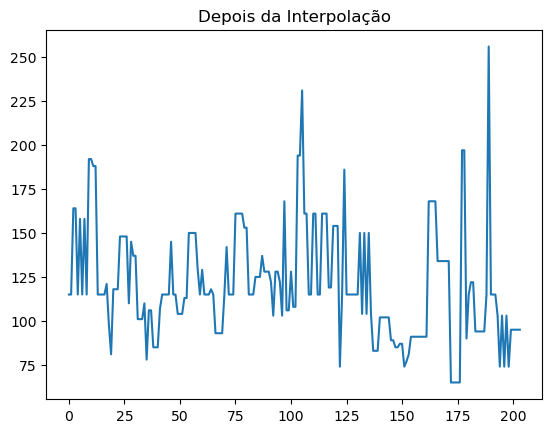

In [12]:
dataset_carros['normalized-losses'].fillna(dataset_carros['normalized-losses'].median(), inplace=True)
dataset_carros['normalized-losses'].plot(title='Depois da Interpolação')

- O valor escolhido para preenchimento do valores vazios da coluna 'normalized-losses' é o da mediana dos dados. Com esse valor é possível notar que há uma coerência dos dados pelo desenho da linha nos gráficos acima. Por fim, os outros valores nulos serão dispensados da análise para iniciar o algoritmo de Machine Learning com o técnia de KNN (K-Nearest Neighbors)